In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import pyfolio as pf

/home/felsal/.local/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
/home/felsal/.local/lib/python3.6/site-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


### Loading data

In [2]:
path = "data/b3_stocks_1994_2020.csv"
df = pd.read_csv(path)
df.loc[:, "datetime"] = df.datetime.map(pd.Timestamp)

### Selecting a subset of tickers

In [3]:
tickers = ["PETR3", "VALE3", "BBDC3", "ITSA4"]
initial_date = "2010-01-01"

df_sort = df.set_index(["ticker", "datetime"]).sort_index()
tss = []
for ticker in tickers:  
    ts = df_sort.xs(ticker).close
    ts.name = ticker
    tss.append(ts)

del df_sort
prices = pd.concat(tss,1).interpolate("linear", limit_direction="both")[initial_date:]
returns = prices.pct_change().dropna()

# display
display(HTML("<h3>Price dataset</h3>"))
display(HTML("<br><b>head<b>"))
display(HTML(prices.head(2).to_html()))
display(HTML("<br><b>tail<b>"))
display(HTML(prices.tail(2).to_html()))
display(HTML("<br><b>shape = {}<b>".format(prices.shape)))

,PETR3,VALE3,BBDC3,ITSA4
datetime,,,,
2010-01-04,41.65,51.49,31.00,12.37
2010-01-05,41.40,51.97,30.56,12.33


,PETR3,VALE3,BBDC3,ITSA4
datetime,,,,
2020-04-29,19.00,46.73,18.77,9.26
2020-04-30,18.65,44.86,17.56,9.00


### Scoring portfolios:
 - **Portfolio 1**: Uniform weights
 - **Portfolio 2**: Concentrated on Banks 

In [4]:
size = prices.shape[1]
p1 = np.repeat(1 / size, size)
p2 = np.array([0.2, 0.2, 0.3, 0.3])

returns_p1 = prices.dot(p1).pct_change()
returns_p2 = prices.dot(p2).pct_change()




In [5]:
ann_factors = {'monthly':12,
               'weekly': 52,
               'daily': 252}

ann_factor  = ann_factors['daily']
raw_sr = np.divide(np.mean(returns_p1), np.std(returns_p1, ddof=1))
ann_sr = raw_sr * ann_factor
ann_sr
print(raw_sr, ann_sr)

0.00165349072115216 0.4166796617303443


0.0833864401951745


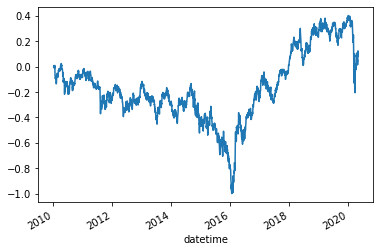

In [6]:
print(returns_p1.cumsum().iloc[-1])
returns_p1.cumsum().plot();

In [7]:
pf.create_returns_tear_sheet(returns_p1)

Start date,2010-01-04
End date,2020-04-30
Total months,121
,Backtest
Annual return,-4.0%
Cumulative returns,-34.0%
Annual volatility,31.4%
Sharpe ratio,0.03
Calmar ratio,-0.06
Stability,0.01
Max drawdown,-71.4%


IndexError: index -1 is out of bounds for axis 0 with size 0